# Data Analysis Project: Investigate US Car Dataset 




## Group Members:
    
1. Hailu Yeshihareg
2. Amal Almuteb
3. Lakpa Lama
4. Akshatha Dandamudi

## Introduction

For this Data Analyst project, we selected the US Car dataset from kaggle to investigate.It collects 2499 cars and their price along with brands, models, color,status and other related information.The description of each featur can be found in [kaggle](https://www.kaggle.com/doaaalsenani/usa-cers-dataset)


### The potental problem that can be discussed in the dataset:

Price is our target feature. We will do most of exploratory data analysis with respect to price.Thus we will discus how price is affected by different features like brand, model, color, status, mileage, state  and year. We are also going to explore popular brand and color over years. We measure popularity interms of number of frequency.

Therefore, the qestions we are going to explore are described as follows:

#### Questions:
1.  General information catagoriesed by different features like year, brand, model, color,state
2.  Popularity Brands Over Years
3.  Price Vs Brand.
4.  Price Vs Color
5.  Price Vs Title status 
6.  Price Vs State
7.  Price Vs Mileage
8.  Brand Vs Title Status
9.  Most Expensive Brand and model
10. The cheapest Brand and model


#### Operations to be performed inorder to do the data analysis mentioned above:

1. General Data Exploring 
2. Data cleaning
3. Wrangling 
4. Data visualization

#### 1. General Data Exploring 
First, let's look what the dataset looks like for preceeding to investigate.

In [1]:
# Import statements for all of the packages that we plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

In [18]:
# Load the data and print out some sample rows. Perform operations to identify which columns are categorical, and numerical
# and look for instances of missing or possibly errant or unrealistic data.
all_data = pd.read_csv('USA_cars_datasets.csv')
all_data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


#### Columns tobe removed
As we can see above, the data set has one unnamed column, it is an index value.Since we have an index during dataframe creation, we don't need this unnamed colummon. we are going to remove it

Columns vin and lot have nothing with our objective of study of this dataset which is described above. Thus we are going to remove this columns too.

In [3]:
#see the column info and null values in the dataset
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


As we can see above, there are total 2499 rows and 12 columns. And there are no null values. Thus we don't have any null value to be removed or replaced with. 
Let's see some descriptive statistics for the data set.

In [4]:
all_data.describe(include='all')
#all_data.describe()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
count,2499.000000,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2499,2.499000e+03,2499,2499,2499
unique,NaN,NaN,28,127,NaN,2,NaN,49,2495,NaN,44,2,47
top,NaN,NaN,ford,door,NaN,clean vehicle,NaN,white,1gndt13s632267445,NaN,pennsylvania,usa,2 days left
freq,NaN,NaN,1235,651,NaN,2336,NaN,707,2,NaN,299,2492,832
mean,1249.000000,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,NaN,1.676914e+08,NaN,NaN,NaN
std,721.543484,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,NaN,2.038772e+05,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,NaN,1.593488e+08,NaN,NaN,NaN
25%,624.500000,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,NaN,1.676253e+08,NaN,NaN,NaN
50%,1249.000000,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,NaN,1.677451e+08,NaN,NaN,NaN
75%,1873.500000,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,NaN,1.677798e+08,NaN,NaN,NaN


#### Observation
1. We can see that there are 28 unique brands and 127 unique models.
2. Ford is the topest brand and door are the topest brand and model with frequency of 1235 and 651 respectively.
3. There are only two category of countries that USA is the top with frequency of 2492; this means the other country is apeared    only with (2499-2492)=7 cars which is insignificant. Thus we are going to remove it.
4. Minimum price of car is zero. This cannot be true. We are going to remove all zero price values.
5. Maximum price of the car in this dataset is $84990.
6. Oldest model of car is from 1973.
7  First quartile value 25% lies in the year 2016. This indicated that more than 75% of the cars are new models and are built      after 2016.

### 2. Data cleaning
Let us explore some unrealistic price values if any. We agreed that prices which are less than $200 will be considered as unrealistic price; thus they are going to remove those rows with unrealistic price values.

In [5]:
#Exploring other unrealistic price values

unrialsticdata=all_data[all_data['price'] < 200]
unrialsticdata

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
141,141,0,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left
144,144,0,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left
188,188,175,chrysler,door,2000,salvage insurance,231240.0,red,2c3hd46r3yh208325,167756464,north carolina,usa,3 days left
196,196,0,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left
206,206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,522,0,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left
530,530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left
534,534,75,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left
541,541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left


As we can see, there are 70 rows with price less than 200. As per our previous discussed, it is time to remove all of them.

In [6]:
#Droping the rows from our data set where price is less than 200


drop_index = all_data[ all_data['price'] <= 200 ].index
all_data.drop(drop_index , inplace=True)
all_data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


###### Before droping columns let's see what what the other coutry with ony 7 rows

In [7]:
Country_roup =  all_data.groupby('country').count()['brand']
Country_roup

country
 canada       7
 usa       2422
Name: brand, dtype: int64

We can see that the other country Canada is shown up with  only 7 records which is about 0.28%. As we have discussed above, 
Since 99% of all cars are under custody of USA, dealing with data of canada has no relevance. 
Thus we are going to drop the column country.

In [8]:
#Droping columns which are not relevant for our data analysis
drop_cols = ['Unnamed: 0', 'country', 'vin','condition']
all_data.drop(columns=drop_cols, axis=1, inplace=True)

### End of data cleaning.
After all this is the dataset that we are going to do data wrangling, 
data visualization and any other further  analysis.

In [9]:
all_data

,price,brand,model,year,title_status,mileage,color,lot,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida
...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,167722715,california
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,167762225,florida
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,167762226,florida
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,167762227,florida


In [10]:
all_data.describe()

,price,year,mileage,lot
count,2429.000000,2429.000000,2.429000e+03,2.429000e+03
mean,19307.960478,2017.052697,4.891796e+04,1.676967e+08
std,11857.758605,2.638679,5.315165e+04,2.025605e+05
min,225.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10850.000000,2016.000000,2.115700e+04,1.676290e+08
50%,17200.000000,2018.000000,3.484100e+04,1.677454e+08
75%,25900.000000,2019.000000,5.890200e+04,1.677801e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


### 3.Data Wrangling

#### Exploratory Data Analysis

1.General information catagoriesed by different features like year, brand, model, color, country,state
2.Popularity Brands Over Years
3.Price Vs Brand.
4.Price Vs Color
5.Price Vs Title status 
6.Price Vs Country
7.Price Vs State
8.Price Vs Mileage
9.Brand Vs Title Status
10.Most Expensive Brand and model
11.The cheapest Brand and model
12.Conclusion

##### 1.General information catagoriesed by different features like year, brand, model, color, and,state
Anayzing by pivoting

In [13]:
subdata=all_data.copy()
subdata=subdata.set_index(['state','mileage','brand', ])
pivoted=pd.pivot_table(subdata,index=["state",'mileage','brand'], 
                        columns=['title_status'],values=['color','price'])
#pivoted.unstack()
#pivoted=pivoted.stack().reset_index()
#pivoted['title_status'] = pivoted['title_status'].replace(0, np.NaN)
pivoted

price                  
title_status                 clean vehicle salvage insurance
state     mileage  brand                                    
alabama   12129.0  nissan          15200.0               NaN
          21669.0  ford            42800.0               NaN
          29320.0  ford            29000.0               NaN
          35902.0  nissan          22800.0               NaN
          35929.0  ford            46700.0               NaN
...                                    ...               ...
wisconsin 149543.0 chevrolet        1200.0               NaN
          151035.0 ford            26400.0               NaN
          173321.0 chevrolet        5100.0               NaN
          202565.0 ford             5000.0               NaN
          507985.0 chevrolet        2000.0               NaN

[2424 rows x 2 columns]

In [14]:
subdata=all_data.copy()
subdata=subdata.set_index(['year','brand', 'model'])
pivoted=pd.pivot_table(subdata,index=['year','brand','model'], 
                        columns=["color"], aggfunc='count' )
pivoted.unstack()
pivoted=pivoted.stack().reset_index()

pivoted

,year,brand,model,color,lot,mileage,mileage_category,price,state,title_status
0,1973,chevrolet,camaro,red,1.0,1.0,1.0,1.0,1.0,1.0
1,2001,chevrolet,door,red,1.0,1.0,1.0,1.0,1.0,1.0
2,2001,dodge,pickup,white,1.0,1.0,1.0,1.0,1.0,1.0
3,2001,ford,pk,red,1.0,1.0,1.0,1.0,1.0,1.0
4,2002,dodge,pk,black,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
991,2020,nissan,cargo,black,1.0,1.0,1.0,1.0,1.0,1.0
992,2020,nissan,rogue,black,3.0,3.0,3.0,3.0,3.0,3.0
993,2020,nissan,rogue,blue,3.0,3.0,3.0,3.0,3.0,3.0
994,2020,nissan,rogue,gray,1.0,1.0,1.0,1.0,1.0,1.0


#### 1.Popular Brands Over Years

In [40]:
# compute count brand for popularity



group_by_year_brand=all_data[['year','brand','lot']]

group_by_year_brand
group_by_year_brand.columns=['year','brand','No_car']

group_by_year_brand=group_by_year_brand.groupby(['year','brand'])
group_by_year_brand=group_by_year_brand['No_car'].count()
group_by_year_brand

year  brand    
1973  chevrolet     1
1984  ford          1
1993  gmc           1
1994  ford          2
1995  chevrolet     1
                   ..
2020  dodge         1
      ford         17
      kia           1
      lexus         1
      nissan       14
Name: No_car, Length: 168, dtype: int64

Here we can see the most popular car every year is ford


#### 4. Data Visualization

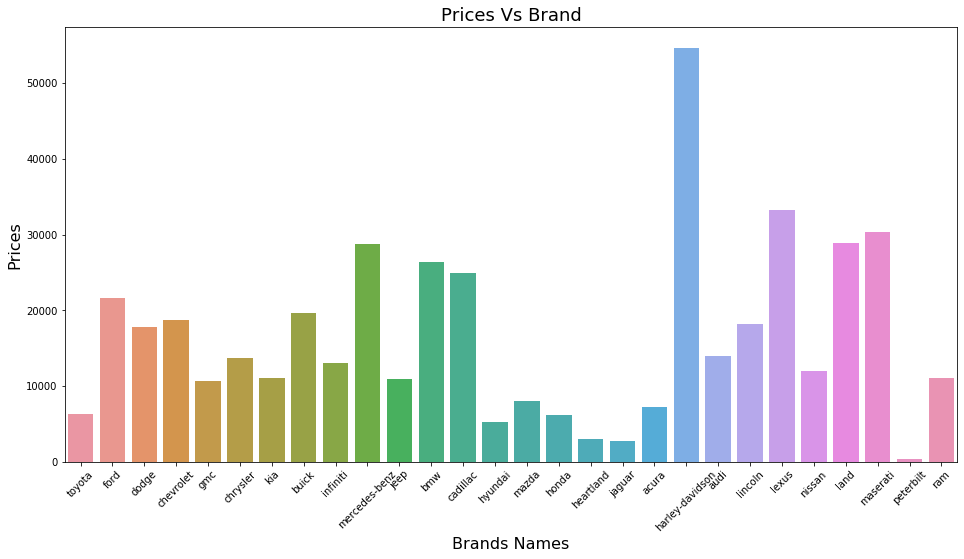

In [45]:
plt.figure(figsize=[16,8])
sns.barplot(data=all_data, x=all_data['brand'], y=all_data['price'], ci=None)
plt.xticks(rotation=45)
plt.xlabel('Brands Names', fontsize=16)
plt.ylabel('Prices', fontsize=16)
plt.title('Prices Vs Brand', fontsize=18)
plt.show()

Here we can see the most expensive car is acura

#### How mileage Vs price.

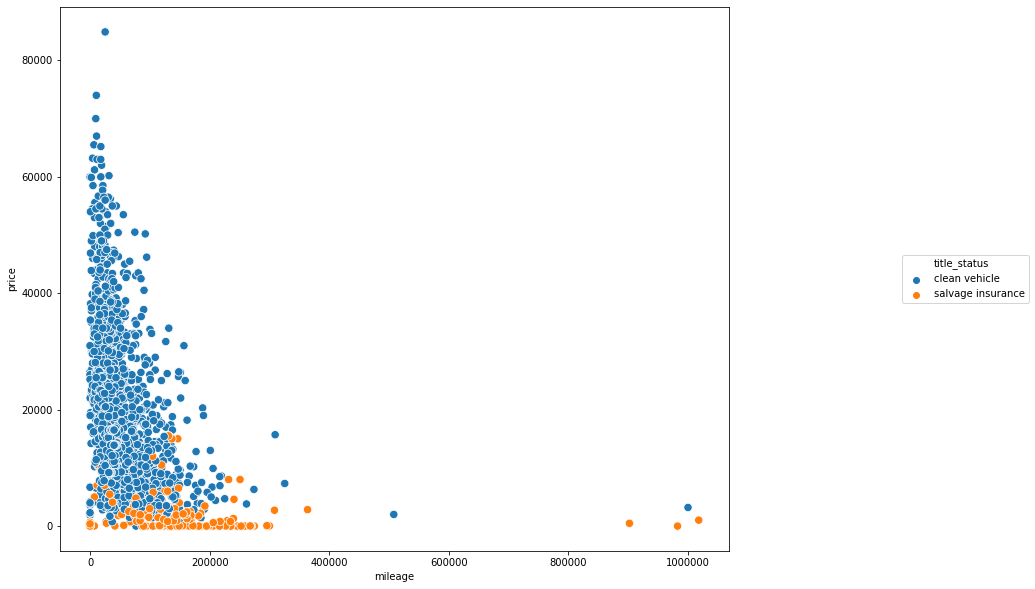

In [46]:
plt.figure(figsize=[12,10])
sns.scatterplot(x=all_data['mileage'], y=all_data['price'], hue=all_data['title_status'], s=70)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

Having high mileage and low price makes sense because more miles traveled by vehicle less will be the price.
Most of the zero prices are due to salvage insurance.

#### Finding vehicle status percentage

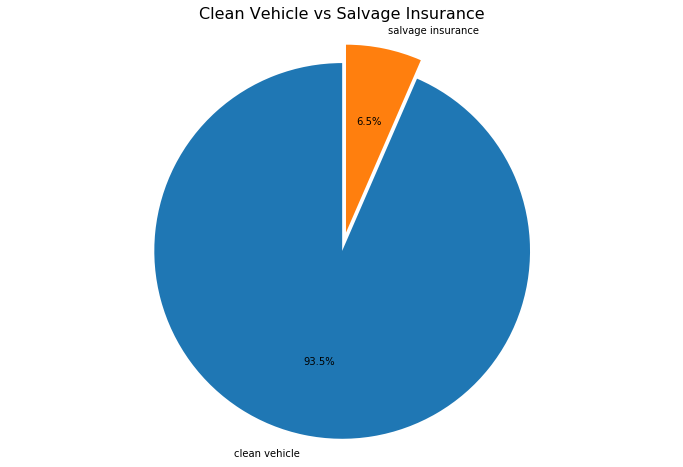

In [52]:
prices_with_status = all_data.groupby('title_status')['title_status'].count()
vehicle_status = pd.DataFrame(prices_with_status.values)
vehicle_status.rename(columns={0: 'Number of Vehicles'}, inplace=True)
vehicle_status['Status'] = prices_with_status.index
vehicle_status['Percentage'] = round((vehicle_status['Number of Vehicles'] / len(all_data))*100,2)

plt.figure(figsize=[12,8])
plt.pie(vehicle_status['Number of Vehicles'], labels=vehicle_status['Status'], autopct='%1.1f%%', startangle=90, 
        explode=[0,0.1])
plt.axis('equal') 
plt.title('Clean Vehicle vs Salvage Insurance', fontsize=16)
plt.show()

We can see that more than 93% of the cars are clean

#### 3. How prices changes per year

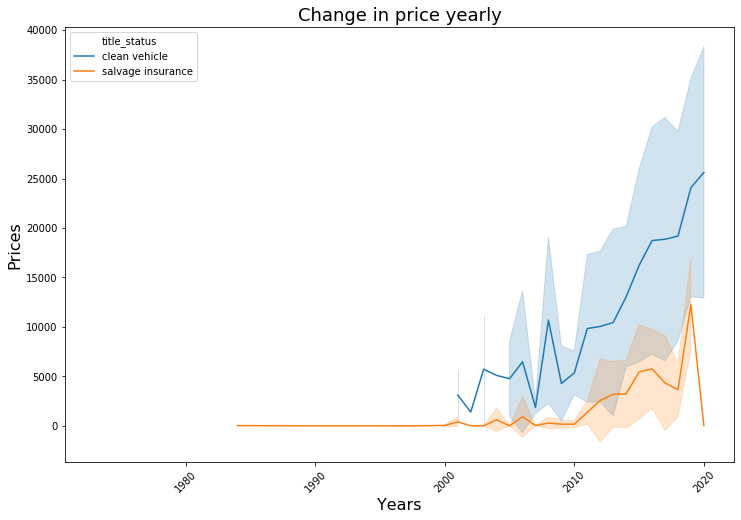

In [55]:
years = [2008, 2011, 2018, 2014, 2010, 2017, 2009, 2013, 2015, 2020, 2016,
       1973, 2003, 2019, 2002, 2000, 2001, 2005, 2012, 2006, 2007, 1998,
       2004, 1994, 1997, 1996, 1999, 1984, 1995, 1993]
years.sort()
yearly_prices = all_data[['price', 'year', 'title_status']].sort_values('year')
yearly_prices['year'] = pd.Categorical(yearly_prices['year'], categories=years, ordered=True)

#plot

plt.figure(figsize=[12,8])
sns.lineplot(data=yearly_prices, x='year', y='price', hue='title_status', ci='sd', sizes=(2.5, 2.5))
plt.xlabel('Years', fontsize=16)
plt.ylabel('Prices', fontsize=16)
plt.title('Change in price yearly', fontsize=18)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


We can see that price of clean cars are accelerating from year to year.But those salvage insurance cars' are flectuating

#### Status Vs Brand VsPrice


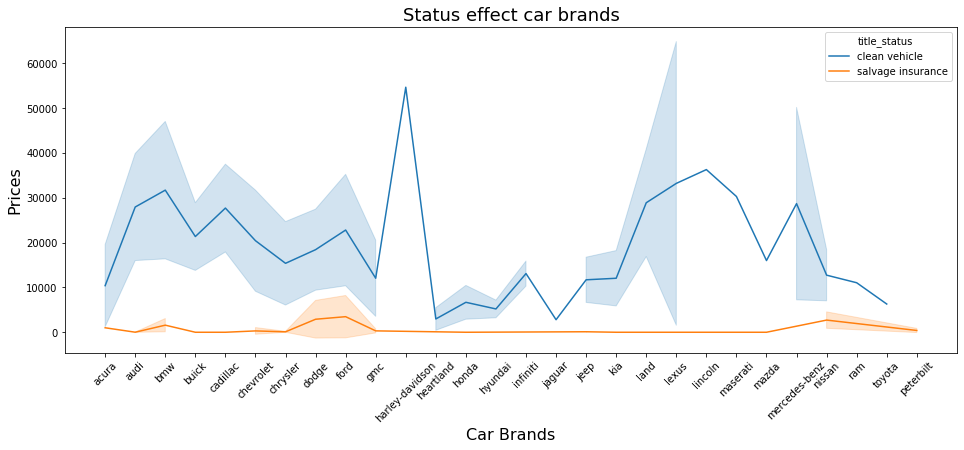

In [54]:
brands_prices= all_data[['price', 'title_status', 'brand']]
plt.figure(figsize=[16,6])
sns.lineplot(data = brands_prices, x='brand', y='price', hue='title_status', ci='sd', sizes=(2.5, 2.5))
plt.xlabel('Car Brands', fontsize=16)
plt.ylabel('Prices', fontsize=16)
plt.title('Status Vs Brand VsPrice', fontsize=18)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### mileage vs Brand

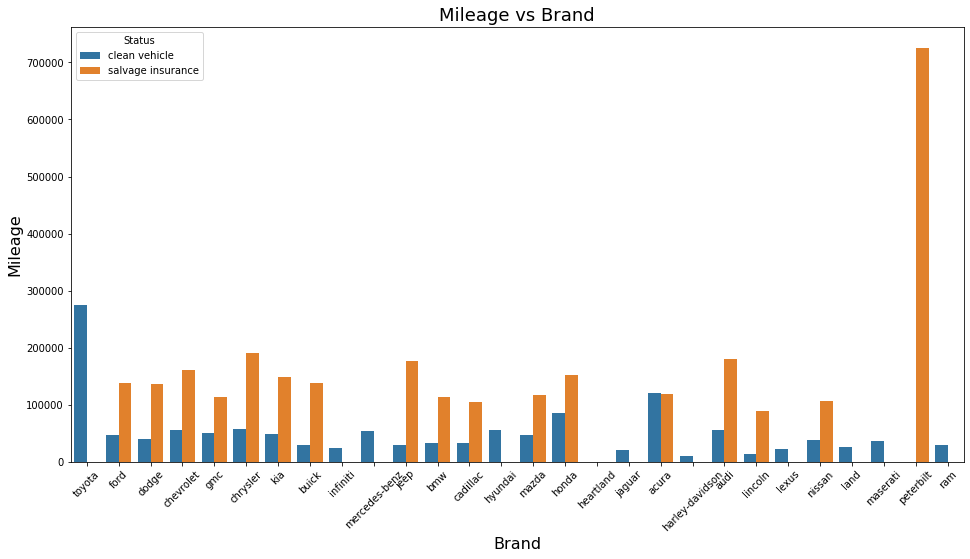

In [56]:
brand_mileage = all_data[['mileage', 'brand', 'title_status']]
plt.figure(figsize=[16,8])
sns.barplot(data=brand_mileage, x='brand', y='mileage', hue='title_status', ci=None)
plt.xlabel('Brand', fontsize=16)
plt.ylabel('Mileage', fontsize=16)
plt.title('Mileage vs Brand', fontsize=18)
plt.xticks(rotation=45)
plt.legend(loc='upper left', title='Status')
plt.show()

7. How many cars each brand has?

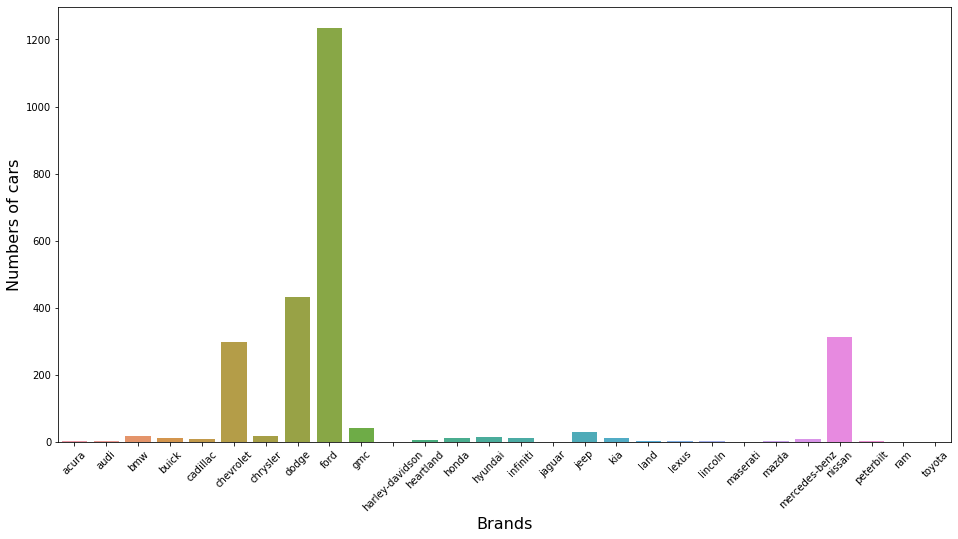

In [58]:
model_amount = all_data.groupby('brand')['model'].count()
brand_car = pd.DataFrame(model_amount.values, columns=['Number of cars'])
brand_car['Brand'] = model_amount.index

# plot

plt.figure(figsize=[16,8])
sns.barplot(data=brand_car, x='Brand', y='Number of cars')
plt.xticks(rotation=45)
plt.xlabel('Brands', fontsize=16)
plt.ylabel('Numbers of cars', fontsize=16)
plt.show()